CURSO CONVIÉRTETE EN DATA SCIENCE  

**Autora**: Lola Gómez Jemes  

**Fecha**: 23/06/2022


<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
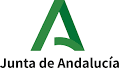
</div>
<div style="float: right; width: 50%;">
</div>
</div>
<div style="width:100%;">&nbsp;</div>

#  

# Trabajo final: Práctica de análisis médico de tumores

En este trabajo vas a aprender diferentes técnicas de ciencia de datos para analizar un caso práctico de análisis médico de tumores. 

El conjunto de datos sobre el que partimos contiene casos de un estudio que se realizó en los Hospitales de la Universidad de Wisconsin, Madison, sobre pacientes que se habían sometido a una cirugía por cáncer de mama. La tarea consiste en determinar si el tumor detectado es benigno o maligno. 

Aplicando los conocimientos aprendidos en este curso, con este trabajo te familiarizarás con:

 <ol start="1">
  <li>La carga de conjuntos de datos</li>
  <li>El análisis de los datos:
  <br>2.1 Análisis estadístico básico
  <br>2.2 Análisis exploratorio de los datos
  <li>La reducción de dimensionalidad</li>
  <li>El uso de árboles CART</li>
</ol>
   
Para ello vas a necesitar las siguientes librerías:

In [ ]:
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#Evaluación modelos
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sns
from sklearn.metrics import classification_report
import random
random.seed(8)
np.random.seed(8)

# 1. Carga del conjunto de datos (1 punto)

En primer lugar, debes cargar el conjunto de datos Breast Cancer Wisconsin (más información en https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)). Éste se puede descargar de Internet o puede ser cargado directamente de la librería "scikit-learn", que incorpora un conjunto de datasets muy conocidos y empleados para minería de datos y machine learning (http://scikit-learn.org/stable/datasets/index.html).

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementación:</strong> Carga el conjunto de datos "Breast Cancer Wisconsin" y muestra el número y nombre de los atributos (variables que podrían ser usadas para predecir la respuesta "Diagnosis"), así como el número de filas obtenidas.
<hr>
Sugerencia: usa sklearn (sklearn.datasets.load_breast_cancer) y explora las diferentes keys del objeto obtenido.
</div>

Vamos a comenzar cargando el dataset. Para ello, vamos a utilizar la librería de scikit learn

In [ ]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

d = load_breast_cancer()

In [ ]:
d.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
d.data.shape

(569, 30)

El dataset está compuesto de 569 instancias (filas) y 30 atributos (columnas). El nombre de las variables se muestra a continuación:

In [ ]:
d.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

Vamos a guardar los datos en un dataframe, para facilitar el acceso a los datos.

In [ ]:
data = pd.DataFrame(d['data'], columns=d['feature_names'])

In [ ]:
data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Además, vamos a guardar la clase del dataset (_target_) en la columna **Diagnosis**

In [ ]:
data['Diagnosis']=pd.Series(data= d.target, index=data.index)

In [ ]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


# 2. Análisis de los datos

## 2.1 Análisis estadístico básico (1 punto)

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementación:</strong> Realiza un análisis estadístico básico indicando, para cada atributo numérico del conjunto de datos, su valor medio y desviación estándard. Para las variables categóricas (en los atributos o la respuesta, si las hay), muestra la frecuencia con la que aparecen las diferentes clases.
<hr>
Sugerencia: puedes usar la librería 'pandas' y sus funciones 'describe' y 'value_counts'
</div>

En primer lugar, vamos a ver el tipo de variables que tenemos. Para ello, vamos usar la función info()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

Los atributos del dataset son todos de tipo *float* (exceptuando la clase). También hemos podido observar que no existe ningún valor nulo en el dataset.

A continuación, se muestra el análisis estadístico básico de todas estas variables. Podemos observar que existen diferencias de magnitud significativas entre las distintas variables.

In [ ]:
data.select_dtypes('float').describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Pasemos a analizar la clase. La clase es de tipo binaria: toma el valor 0 si el cáncer es maligno, y 1 si es benigno. Consideramos esta variable categórica.

In [ ]:
d.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
data['Diagnosis'].value_counts()

1    357
0    212
Name: Diagnosis, dtype: int64

212 muestras pertenecen a tumores malignos, y 357 a benignos.

## 2.2 Análisis exploratorio de los datos (3 puntos)

En este ejercicio vas a explorar la relación de algunos de los atributos numéricos con la variable respuesta ("Diagnosis"), tanto gráficamente como cuantitativamente. Para empezar, selecciona los 4 atributos que deseas explorar. Si has usado los nombres de columnas proporcionados por sklearn, una lista de posibles nombres de atributos serían:

In [ ]:
feats_to_explore = ['mean radius', 'mean texture', 'mean smoothness', 'mean symmetry']

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementación:</strong> Utilizando una librería gráfica, como por ejemplo "matplotlib", realiza un gráfico del histograma de valores para cada uno de los atributos seleccionados, separados por los valores de clase de la respuesta ("Diagnosis"). La finalidad es que observes como se distribuye cada uno de los atributos en función del valor de clase que toman, para poder identificar de forma visual y rápida si algunos atributos permiten diferenciar de forma clara los diferentes diagnósticos de los tumores.
</div>

Vamos a mostrar la distribución de las cuatro variables del array *feats_to_explore*, para evaluar cómo varía en función del valor de la clase:

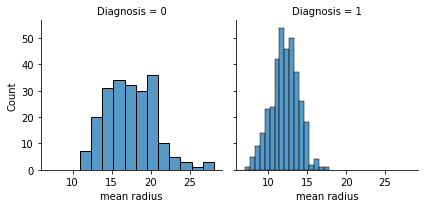

In [ ]:
g = sns.FacetGrid(data, col='Diagnosis')
g.map(sns.histplot,feats_to_explore[0])

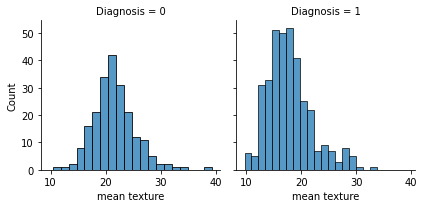

In [ ]:
g = sns.FacetGrid(data, col='Diagnosis')
g.map(sns.histplot,feats_to_explore[1])


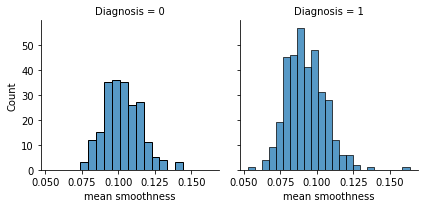

In [ ]:
g = sns.FacetGrid(data, col='Diagnosis')
g.map(sns.histplot,feats_to_explore[2])


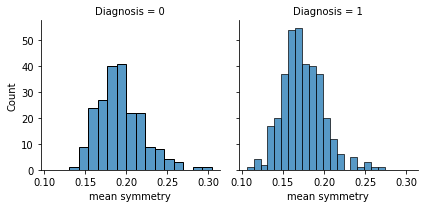

In [ ]:
g = sns.FacetGrid(data, col='Diagnosis')
g.map(sns.histplot,feats_to_explore[3])


Podemos observar que, para las cuatro variables, la distribución cambia según el valor de la clase. Para la clase 1, podemos observar que los atributos presentan una distribución asimétrica hacia la izquierda. En cambio, para el valor 0 presentan una distribución más simétrica.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementación:</strong> Para cada uno de los atributos representados en el ejercicio anterior, muestra la media y la desviación estándard para cada valor de clase de la respuesta ("Diagnosis"). La finalidad es que verifiques numéricamente las diferencias identificadas anteriormente de forma visual.
</div>

In [ ]:
data.groupby('Diagnosis')[feats_to_explore].describe()

mean radius                                                      \
                count       mean       std     min     25%     50%    75%   
Diagnosis                                                                   
0               212.0  17.462830  3.203971  10.950  15.075  17.325  19.59   
1               357.0  12.146524  1.780512   6.981  11.080  12.200  13.37   

                 mean texture                                              \
             max        count       mean       std    min      25%    50%   
Diagnosis                                                                   
0          28.11        212.0  21.604906  3.779470  10.38  19.3275  21.46   
1          17.85        357.0  17.914762  3.995125   9.71  15.1500  17.39   

                         mean smoothness                               \
              75%    max           count      mean       std      min   
Diagnosis                                                               
0          23.765  39.28           212.0  0.102898  0.012608  0.07371   
1          19.760  33.81           357.0  0.092478  0.013446  0.05263   

                                              mean symmetry            \
               25%      50%       75%     max         count      mean   
Diagnosis                                                               
0          0.09401  0.10220  0.110925  0.1447         212.0  0.192909   
1          0.08306  0.09076  0.100700  0.1634         357.0  0.174186   

                                                               
                std     min      25%     50%      75%     max  
Diagnosis                                                      
0          0.027638  0.1308  0.17405  0.1899  0.20985  0.3040  
1          0.024807  0.1060  0.15800  0.1714  0.18900  0.2743

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong>

<br> - Mirando los gráficos, ¿qué atributos te parecen que tienen valores claramente diferentes para diagnósticos benignos y malignos? ¿Qué atributos no?

Mirando la gráfica, podemos observar que las variables 'mean radius' (radio medio) y 'mean texture' (textura media) presentan mayores diferencias. Podemos observar que, para los tumores benignos, tenemos una distribución asimétrica hacia la izquierda. Esto significa que la mayoría de tumores tienen un valor bajo para estas variables. En cambio, para las otras variables podemos observar que comparten valores más similares para tumores malignos y benignos

<br> - Mirando a los valores medios y desviaciones estándard calculadas, ¿te parecen significativas las diferencias para diagnósticos benignos y malignos?

Mirando los valores medios y desviaciones, podemos verificar que lo que habíamos observado gráficamente se cumple: 'mean radius' y 'mean texture' van a ser relevantes para la clasificación de tumores. Sobre todo, la variable que más difiere es mean radius. 
</div>

# 3. Reducción de dimensionalidad (2 puntos)

En este ejercicio debes aplicar métodos de reducción de dimensionalidad al conjunto original de datos. El objetivo es reducir el conjunto de atributos a un nuevo conjunto con menos dimensiones.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementación:</strong> Aplicad los métodos de reducción de dimensionalidad:
<br>- Principal Component Analysis (PCA)
<br>- t-distributed Stochastic Neighbor Embedding (t-SNE)
<br>para reducir el conjunto de datos a 2 dimensiones.

<hr>
Sugerencia: No es necesario que programes los algoritmos, debes de hacer uso de las implementaciones disponibles en la librería "scikit-learn".
</div>

In [ ]:
#Separamos la clase y los atributos (x e y)
x=data.drop('Diagnosis', axis=1)
y = pd.DataFrame({'target':data['Diagnosis'][:]})

**1. PCA**

In [ ]:
x_scaled = StandardScaler().fit_transform(x) #normalizamos los valores porque tenían distintas magnitudes
pca = PCA(n_components=2, random_state=8)#seleccionamos 2 componentes
principalComponents = pca.fit_transform(x_scaled)
X_PCA = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [ ]:
df = pd.concat([X_PCA, y], axis = 1)

In [ ]:
df.head()

,principal component 1,principal component 2,target
0,9.192837,1.948583,0
1,2.387802,-3.768172,0
2,5.733896,-1.075174,0
3,7.122953,10.275589,0
4,3.935302,-1.948072,0


**2. t-SNE**

In [ ]:
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300, random_state=8) #2 componentes
tsne_results = tsne.fit_transform(x_scaled)
df_tsne = pd.DataFrame(data = tsne_results,columns = ['t-sne1', 't-sne2'])

df_tsne_with_target = pd.concat([df_tsne, y[['target']]], axis = 1)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [ ]:
df_tsne_with_target.head()

,t-sne1,t-sne2,target
0,11.225242,-13.160934,0
1,9.435220,-5.310442,0
2,9.332875,-9.732940,0
3,1.473411,-11.549283,0
4,12.104710,-5.149854,0


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementación:</strong> Genera un gráfico (en 2D) con el resultado de cada uno de los métodos de reducción de la dimensión, usando colores diferentes para cada clase de la respuesta, con el objetivo de visualizar si es posible separar eficientemente las clases empleando estos métodos.</div>

**1. PCA**

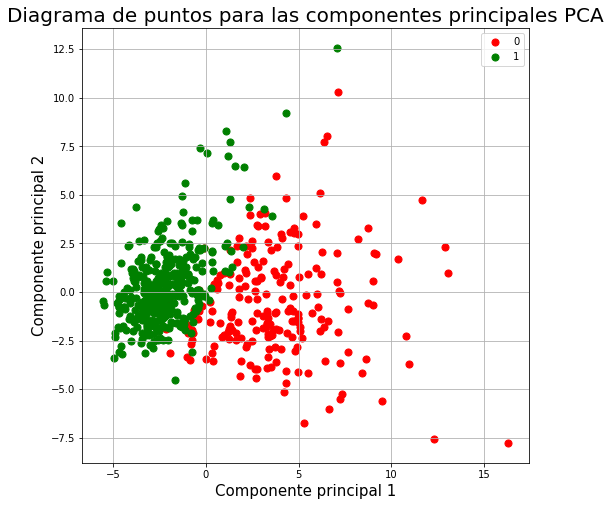

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Componente principal 1', fontsize = 15)
ax.set_ylabel('Componente principal 2', fontsize = 15)
ax.set_title('Diagrama de puntos para las componentes principales PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = y['target'] == target
    ax.scatter(df.loc[indicesToKeep, 'principal component 1']
               , df.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

**2. t-SNE**

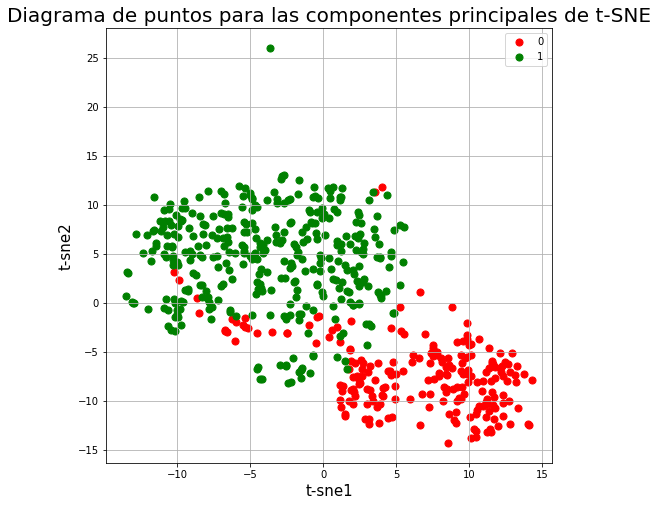

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('t-sne1', fontsize = 15)
ax.set_ylabel('t-sne2', fontsize = 15)
ax.set_title('Diagrama de puntos para las componentes principales de t-SNE', fontsize = 20)
targets = [0,1]
colors = ['r', 'g']
for target, color in zip(targets,colors):    
    indicesToKeep =  df_tsne_with_target['target'] == target
    ax.scatter(df_tsne_with_target.loc[indicesToKeep, 't-sne1']
               , df_tsne_with_target.loc[indicesToKeep, 't-sne2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong>
<br> - ¿Qué método de reducción de dimensionalidad ha resultado más efectivo para visualizar las dos clases de diagnóstico de forma separada?

El método de reducción que ha resultado más efectivo ha sido el PCA. Como se puede observar en la gráfica anterior, el tsne no ha sabido separar tan claramente las dos clases
</div>

# 4. Aplicación de CART (3 puntos)

En este último ejercicio debes de aplicar un método de aprendizaje supervisado: árboles de decisión. Lo utilizarás para predecir el diagnóstico de cáncer de mama (distinción entre tumor benigno o maligno) y evaluar la precisión obtenida con el modelo, usando:

- El conjunto de datos original con todos los atributos
- El conjunto de datos reducido a sólo 2 atributos con el método PCA

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementación:</strong> Entrena dos modelos usando árboles de decisión (con una profundidad máxima limitada a 3 niveles para mantener el modelo simple): uno usando el conjunto de datos original y el otro usando el conjunto de datos reducido con PCA.
<br>Calcula la precisión de las predicciones obtenidas por cada uno de los modelos (accuracy) así como la matriz de confusión asociada.
<hr>
Sugerencia: es necesario que generes un conjunto de datos de entrenamiento para calibrar el modelo, y otro conjunto de test para evaluar la bondad de cada uno de los modelos creados. Puedes utilizar los módulos 'train_test_split', 'DecisionTreeClassifier' y las funciones dentro del módulo 'metrics' de sckit-learn.
</div>

In [ ]:
#ORIGINALES
X =data.drop('Diagnosis', axis=1)
y= data['Diagnosis']

#PCA
X_PCA = df.drop('target', axis=1)
y_PCA = df['target']

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=8)
X_train_PCA, X_test_PCA, y_train_PCA, y_test_PCA=train_test_split(X_PCA, y_PCA, test_size=0.2, random_state=8)

**1. Datos originales**

In [ ]:
est = DecisionTreeClassifier(max_depth=2, random_state=8)
est.fit(X_train, y_train)
y_pred = est.predict(X_test)

**2. Datos PCA**

In [ ]:
est2 = DecisionTreeClassifier(max_depth=2, random_state=8)
est.fit(X_train_PCA, y_train_PCA)
y_pred_PCA = est.predict(X_test_PCA)

Resultados y matriz de confusión:

Vamos a definir una función para evaluar los modelos:

In [ ]:
def resultados(y_test, y_pred):
  
  accuracy=metrics.accuracy_score(y_test,y_pred)
  f1= metrics.f1_score(y_test,y_pred)
  precisicion= metrics.precision_score(y_test,y_pred)
  recall= metrics.recall_score(y_test,y_pred)
  auc=metrics.roc_auc_score(y_test,y_pred)
  res= {'Accuracy': accuracy, 'Precision': precisicion, "Recall": recall, "F1": f1, "roc auc scores": auc}

  return res

In [ ]:
res= resultados(y_test, y_pred)
res2 = resultados(y_test_PCA, y_pred_PCA)
comparacion = pd.DataFrame(res, index=['Datos originales'])
comparacion.loc['Datos reducidos a 2 Dimensiones'] = res2
comparacion

,Accuracy,Precision,Recall,F1,roc auc scores
Datos originales,0.894737,0.90,0.926471,0.913043,0.887148
Datos reducidos a 2 Dimensiones,0.903509,0.88,0.970588,0.923077,0.887468


Text(0.5, 1.0, 'Matriz de confusión para datos originales')

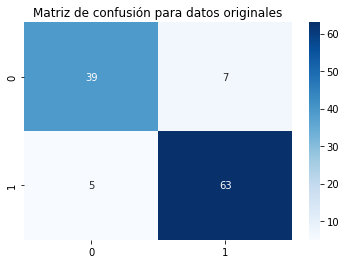

In [ ]:
matrix1= confusion_matrix(y_test, y_pred)
sns.heatmap(matrix1, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de confusión para datos originales')

Text(0.5, 1.0, 'Matriz de confusión para datos reducidos PCA')

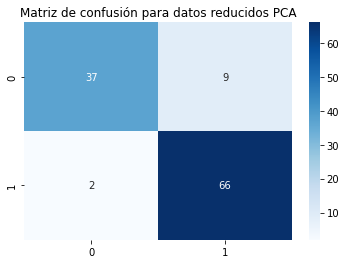

In [ ]:
matrix2= confusion_matrix(y_test_PCA, y_pred_PCA)
sns.heatmap(matrix2, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de confusión para datos reducidos PCA')

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong>
<br> - ¿Con qué tipo de datos (originales o reducidos) has obtenido una precisión (accuracy) mayor?
Hemos obtenido mejor precisión con los datos reducidos.

<br> - Si el usuario del modelo de predicción, un hospital por ejemplo, quisese usar el modelo con el menor número de tumores malignos erroneamente clasificados como benignos, ¿cuál de los dos modelos tendría que usar? ¿Porqué?
Tendríamos que utilizar el modelo entrenado con los datos reducidos ya que le número de falsos negativos en ese modelo (2) es menor que el entrenado con los datos originales (5).

<br> - ¿Y si el hospital quisese usar el modelo con el menor número de tumores benignos erroneamente clasificados como malignos, cuál de los dos modelos usaría? ¿Porqué? En este caso debería utilizar el modelo entrenado con los datos originales ya que los falsos positivos (7) son menores que el entrenado con los reducidos (9).
</div>

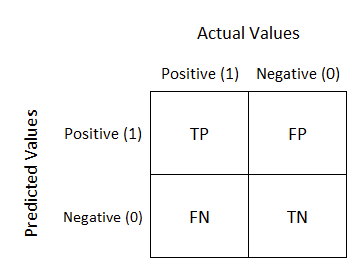